<a href="https://colab.research.google.com/github/Oriel32/Titanic-ClassicML/blob/main/%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98_%D7%A0%D7%99%D7%AA%D7%95%D7%97_%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# find a dataset to work with
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# load the dataset 'titanic' - trying to predict target column 'survived'
titanic = sns.load_dataset('titanic')

In [4]:
# Exploratory Data Analysis
# first 5 rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# last 5 rows
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
# info about the dataset (nulls, dtypes, columns)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# get total values of null for each column
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
# change 'embarked' null values to its mode
null_embarked = titanic['embarked'].isnull()
titanic.loc[null_embarked,['embarked']] = titanic['embarked'].mode().values[0]

In [9]:
# check if survived and alive has the same values : sum should be 0 if so
label = LabelEncoder()
titanic['alive'] = label.fit_transform(titanic['alive'])
(titanic['survived'] != titanic['alive']).sum()

np.int64(0)

In [10]:
# drop unnecessary columns (dropping 'deck value because most of the data is null')
titanic.drop(['alive', 'who', 'embark_town', 'deck'], axis = 1, inplace=True)

In [11]:
# check the dataset without the unnecessary columns
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True


In [12]:
titanic.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
adult_male,2


In [13]:
# one hot encoder to categorial columns
numeric_cols = ['age', 'fare']
category_cols = ['pclass', 'sex', 'embarked', 'class', 'adult_male', 'alone']
ohe = OneHotEncoder(drop = 'first', sparse_output=False)
encoded = ohe.fit_transform(titanic[category_cols])
encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(category_cols), index = titanic.index)
titanic = pd.concat([titanic.drop(category_cols, axis = 1), encoded_df], axis = 1)

In [14]:
# check again the dataset
titanic.head()

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,class_Second,class_Third,adult_male_True,alone_True
0,0,22.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,35.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [15]:
# check if all null values handled
titanic.isnull().sum()

,0
survived,0
age,177
sibsp,0
parch,0
fare,0
pclass_2,0
pclass_3,0
sex_male,0
embarked_Q,0
embarked_S,0


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic)

In [17]:
imputer = KNNImputer()
imputed_data = imputer.fit_transform(scaled_data)
inversed = scaler.inverse_transform(imputed_data)
titanic = pd.DataFrame(inversed, columns = titanic.columns)

In [18]:
titanic.head()

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,class_Second,class_Third,adult_male_True,alone_True
0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [19]:
# choose the features and the target (survived) and split the data to train (80% of the data) and test (20% of the data)
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# create models dictionary for training set
models = {
    'KNN - KNeighbors Classifier': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}
compare_accuracy1 = []

# use of training set to train all types of models at once
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    compare_accuracy1.append(accuracy_score(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    # analyze random forest importance of features - print top 5 helpful features for prediction and the total presentage of low important features
    if name == 'Random Forest':
        importance = pd.Series(model.feature_importances_ * 100, index=X.columns)
        top_features = importance.sort_values(ascending=False).head(5)
        print(f"Top features:")
        for feature, precantage in zip(top_features.index, top_features.values):
            print(f"{feature}: {precantage:.2f}%")
        print(f"\ntotal precentage of low importance features : {importance[importance.values < 1].sum():.2f}%")


KNN - KNeighbors Classifier:
Accuracy: 0.74
Confusion Matrix:
[[88 17]
 [29 45]]
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       105
         1.0       0.73      0.61      0.66        74

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179


Random Forest:
Accuracy: 0.85
Confusion Matrix:
[[91 14]
 [12 62]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       105
         1.0       0.82      0.84      0.83        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179

Top features:
age: 25.52%
fare: 23.24%
adult_male_True: 17.20%
sex_male: 12.91%
class_Third: 4.31%

total precentage of low importance features : 1.66%



KNN - KNeighbors Classifier:
Accuracy: 0.83
Confusion Matrix:
[[94 11]
 [19 55]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       105
         1.0       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



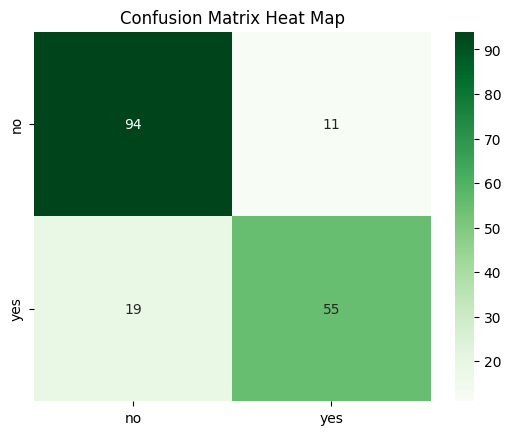


Random Forest:
Accuracy: 0.87
Confusion Matrix:
[[97  8]
 [16 58]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       105
         1.0       0.88      0.78      0.83        74

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.86       179



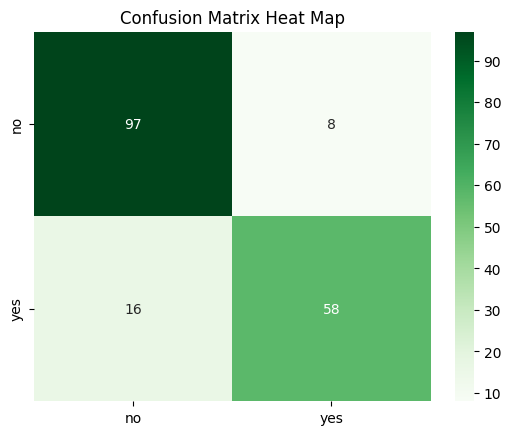

Top features:
sex_male: 21.76%
age: 19.72%
fare: 19.48%
adult_male_True: 16.41%
pclass_3: 5.19%

total precentage of low importance features : 0.76%


In [22]:
# create models dictionary with adjusted hyperparameters for training set
models = {
    'KNN - KNeighbors Classifier': KNeighborsClassifier(
        n_neighbors=14,  # n_neighbors : מספר שכנים בקרבה לשימוש
        p=1, # p : סוג העונש
        weights='distance'), # weights : נקודות קרובות יותר ישפיעו יותר

    'Random Forest': RandomForestClassifier(
        random_state=42,  # random_state: מאפשר שחזור תוצאות ועקביות
        n_estimators=150,  # n_estimators: מספר העצים ביער - מספר גבוה יכול לשפר דיוק אך גם לפגוע בזמן הריצה
        min_samples_leaf=2,  # min_samples_leaf: מספר דגימות מינימלי בכל עלה - מספר נמוך יכול להוביל לאובר-פיטינג
        max_depth=15  # max_depth: העומק המקסימלי בכל עץ ביער - מספר גבוה מידי יכול להוביל לאובר-פיטינג
    )
}
compare_accuracy2 = []

# use of training set to train all types of models at once
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    compare_accuracy2.append(accuracy_score(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #defining the confusion matrix and heatmap for the Logistic Regression model
    con_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(con_matrix,
                annot = True,
                fmt = 'd',
                cmap = 'Greens',
                xticklabels=label.classes_,
                yticklabels=label.classes_
    )
    plt.title('Confusion Matrix Heat Map')
    plt.show()
    # analyze random forest importance of features - print top 5 helpful features for prediction and the total presentage of low important features
    if name == 'Random Forest':
        importance = pd.Series(model.feature_importances_ * 100, index=X.columns)
        top_features = importance.sort_values(ascending=False).head(5)
        print(f"Top features:")
        for feature, precantage in zip(top_features.index, top_features.values):
            print(f"{feature}: {precantage:.2f}%")
        print(f"\ntotal precentage of low importance features : {importance[importance.values < 1].sum():.2f}%")


In [23]:
# compare accuracy between models with and without hyperparameters
for model, i, j in zip(models.keys(), compare_accuracy1, compare_accuracy2):
    print (f"{model} : without - {i:.2f}%, with - {j:.2f}%")

KNN - KNeighbors Classifier : without - 0.74%, with - 0.83%
Random Forest : without - 0.85%, with - 0.87%
